In [333]:
import pandas as pd
import numpy as np
from astropy.table import Table

In [334]:
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 125

In [336]:
import seaborn as sns
sns.set_style('whitegrid')

In [337]:
from gal_data import gal_data

In [338]:
w1re = pd.read_csv('data/w1re.csv')
w2re =  pd.read_csv('data/w2re.csv')
w3re =  pd.read_csv('data/w3re.csv')
w4re =  pd.read_csv('data/w3re.csv')
nuvre=  pd.read_csv('data/nuvre.csv')
fuvre=  pd.read_csv('data/fuvre.csv')


In [339]:
df = pd.read_csv('data/apertures_gauss15_all.csv')
cols = ['PGC', 'DIST_MPC','E_DIST_DEX','LOGMASS','E_LOGMASS','LOGSFR',
        'E_LOGSFR','METHOD_SFR','DELTAMS','T','MORPH','BAR','GALTYPE', 'GALTYPE_COURSE','R25_DEG']

In [340]:
df.PGC = ['PGC'+str(i) for i in df.PGC]

In [341]:
from astropy import units as u

In [342]:
w1re = w1re.merge(df[cols],on='PGC')
w1re['INCL_DEG']=gal_data(w1re.PGC)['INCL_DEG']
w1re['logre'] = np.log10(w1re.re)
mask = np.logical_and(w1re['INCL_DEG']<70., w1re['LOGMASS']>8.)
w1re=w1re[mask]

In [343]:
w2re = w2re.merge(df[cols],on='PGC')
w2re['INCL_DEG']=gal_data(w2re.PGC)['INCL_DEG']
w2re['logre'] = np.log10(w2re.re)
w2re=w2re[w2re['INCL_DEG']<70.]
mask = np.logical_and(w2re['INCL_DEG']<70., w2re['LOGMASS']>8.)
w2re=w2re[mask]

In [344]:
w3re = w3re.merge(df[cols],on='PGC')
w3re['INCL_DEG']=gal_data(w3re.PGC)['INCL_DEG']
w3re['logre'] = np.log10(w3re.re)
mask = np.logical_and(w3re['INCL_DEG']<70., w3re['LOGMASS']>8.)
w3re=w3re[mask]

In [345]:
w4re = w4re.merge(df[cols],on='PGC')
w4re['INCL_DEG']=gal_data(w4re.PGC)['INCL_DEG']
w4re['logre'] = np.log10(w4re.re)
mask = np.logical_and(w4re['INCL_DEG']<70., w4re['LOGMASS']>8.)
w4re=w4re[mask]

In [346]:
nuvre = nuvre.merge(df[cols],on='PGC')
nuvre['INCL_DEG']=gal_data(nuvre.PGC)['INCL_DEG']
nuvre['logre'] = np.log10(nuvre.re)
mask = np.logical_and(nuvre['INCL_DEG']<70., nuvre['LOGMASS']>8.)
nuvre=nuvre[mask]

In [347]:
fuvre = fuvre.merge(df[cols],on='PGC')
fuvre['INCL_DEG']=gal_data(fuvre.PGC)['INCL_DEG']
fuvre['logre'] = np.log10(fuvre.re)
mask = np.logical_and(fuvre['INCL_DEG']<70., fuvre['LOGMASS']>8.)
fuvre=fuvre[mask]

In [348]:
w1re['band'] = 'w1'
w2re['band'] = 'w2'
w3re['band'] = 'w3'
w4re['band'] = 'w4'
nuvre['band'] = 'nuv'
fuvre['band'] = 'fuv'

In [349]:
allre = pd.concat([w1re,w2re,w3re,w4re,nuvre,fuvre],ignore_index=True)


In [350]:
allre['rekpc'] = allre.re*u.arcsec.to(u.radian)*allre.DIST_MPC*1000
allre['logrekpc'] = np.log10(allre.rekpc)

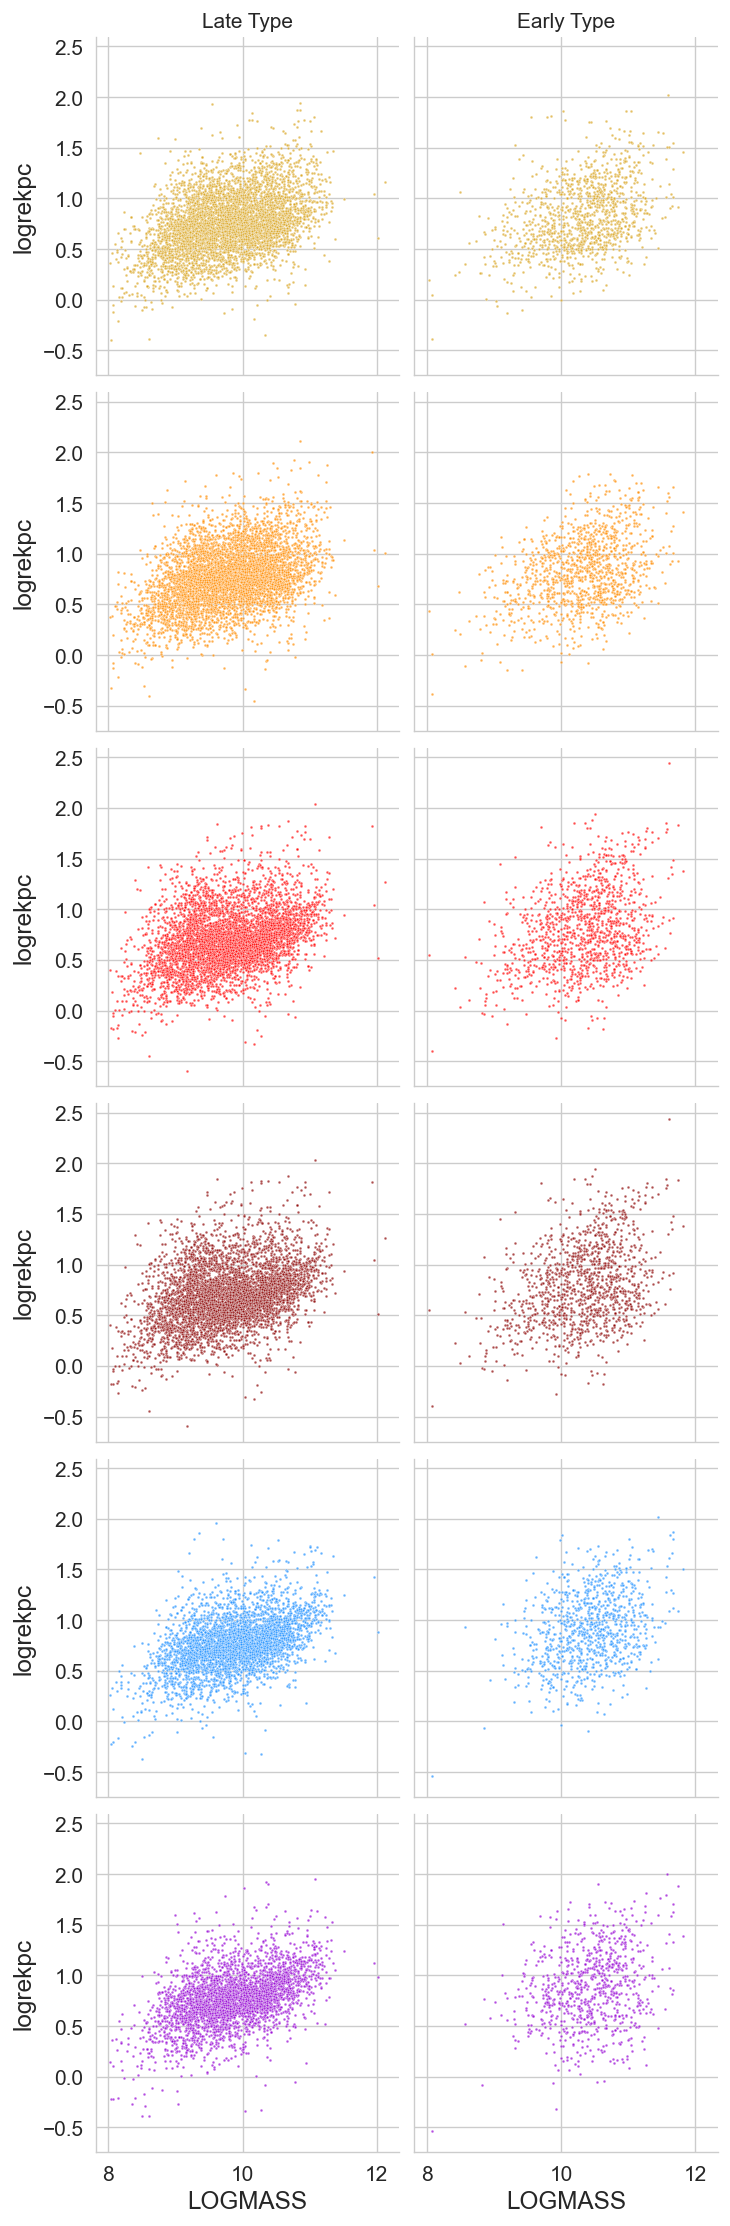

In [354]:
cs = ['goldenrod','darkorange','red','darkred','dodgerblue','darkviolet']
g = sns.FacetGrid(allre, col="GALTYPE_COURSE",row="band", hue="band",palette=cs)
#g.map(sns.kdeplot, "LOGMASS", "logrekpc",zorder=0)
g.map(sns.scatterplot, "LOGMASS", "logrekpc",marker='.',s=10,alpha=0.7)
g.set_titles('')
axes = g.axes.flatten()
axes[0].set_title("Late Type")
axes[1].set_title("Early Type")
axes[1].set_xlabel('')
axes[0].set_xlabel('')

g.fig.subplots_adjust(wspace=0.05, hspace=0.05)


Text(0.5, 1886.5810185185185, '')

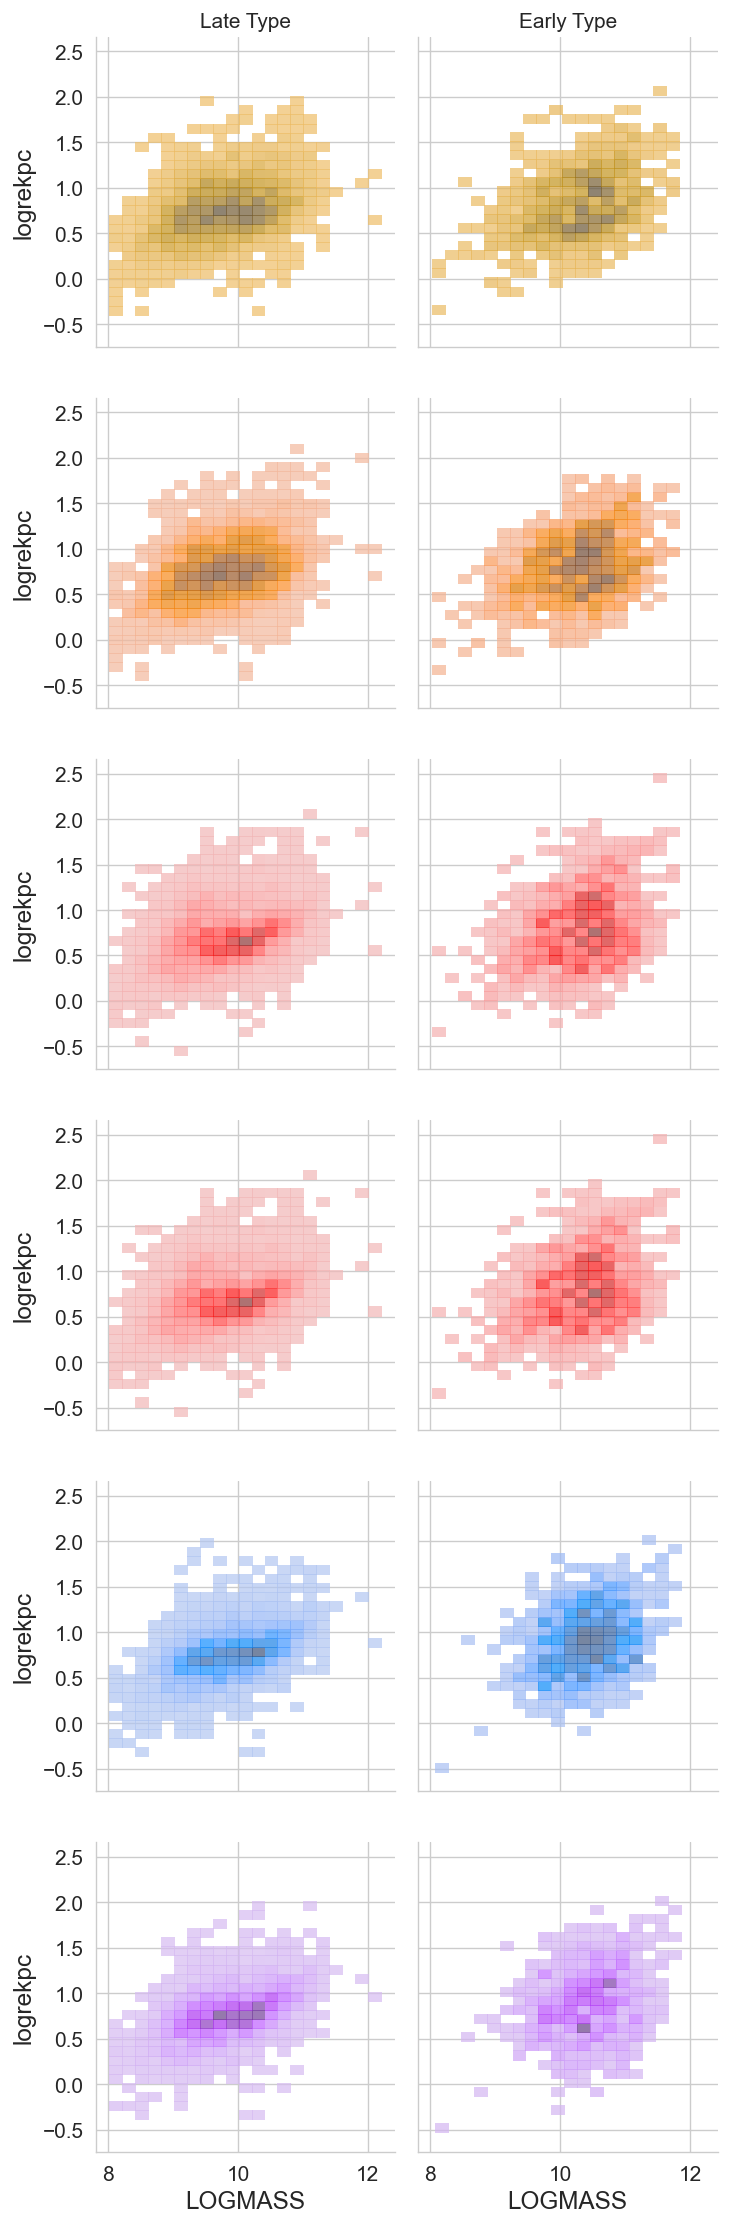

In [352]:
cs = ['goldenrod','darkorange','red','darkred','dodgerblue','darkviolet']
g = sns.FacetGrid(allre, col="GALTYPE_COURSE",row="band", hue="band",palette=cs)
g.map(sns.histplot, "LOGMASS", "logrekpc",binwidth=(0.2,0.1),alpha=0.7)
g.set_titles('')
axes = g.axes.flatten()
axes[0].set_title("Late Type")
axes[1].set_title("Early Type")
axes[1].set_xlabel('')
axes[0].set_xlabel('')
g.fig.subplots_adjust(wspace=0.05, hspace=0.05)


In [206]:
di = Table.read('data/delivery_index_gauss15.fits').to_pandas()
di.PGC_NAME=di.PGC_NAME.str.decode('utf-8')
di.PGC_NAME = [i.strip() for i in di.PGC_NAME]

In [190]:
w1pkl = pd.read_pickle('radprofilepkls/W1_radprofiles.pkl')

In [192]:
w1pkl[:5]

,r_arcsec,I,Norm_I,gal
0,2.501307,0.303378,0.009883,PGC56796
1,5.620195,0.263937,0.018481,PGC56796
2,7.025627,0.257195,0.026859,PGC56796
3,7.510656,0.229316,0.034329,PGC56796
4,8.007439,0.255596,0.042655,PGC56796


In [211]:
w1di = w1pkl.merge(di[['PGC_NAME','STD_WISE1']],left_on='gal',right_on='PGC_NAME')

In [212]:
w1di.head()

,r_arcsec,I,Norm_I,gal,PGC_NAME,STD_WISE1
0,2.501307,0.303378,0.009883,PGC56796,PGC56796,0.066032
1,5.620195,0.263937,0.018481,PGC56796,PGC56796,0.066032
2,7.025627,0.257195,0.026859,PGC56796,PGC56796,0.066032
3,7.510656,0.229316,0.034329,PGC56796,PGC56796,0.066032
4,8.007439,0.255596,0.042655,PGC56796,PGC56796,0.066032


In [281]:
grouped = w1di.groupby('gal').mean()
sn = grouped['I']/grouped['STD_WISE1']

In [282]:
grouped['sn'] = sn

In [283]:
mmres = pd.read_csv('data/mmres_allotherstuff.csv')
mmres['PGCNAME'] = ['PGC'+str(i) for i in mmres.PGC]

In [294]:
mmres = mmres.merge(grouped[['sn']],left_on='PGCNAME',right_index=True)

In [287]:
grouped.index

Index(['PGC100031', 'PGC100035', 'PGC100042', 'PGC100050', 'PGC100060',
       'PGC100070', 'PGC100071', 'PGC10008', 'PGC100080', 'PGC1000913',
       ...
       'PGC996928', 'PGC9972', 'PGC997642', 'PGC998458', 'PGC9985', 'PGC9987',
       'PGC9988', 'PGC998846', 'PGC9991', 'PGC9993'],
      dtype='object', name='gal', length=15441)

In [299]:
bins = np.arange(-2,1,.1)

<AxesSubplot:xlabel='sn', ylabel='Density'>

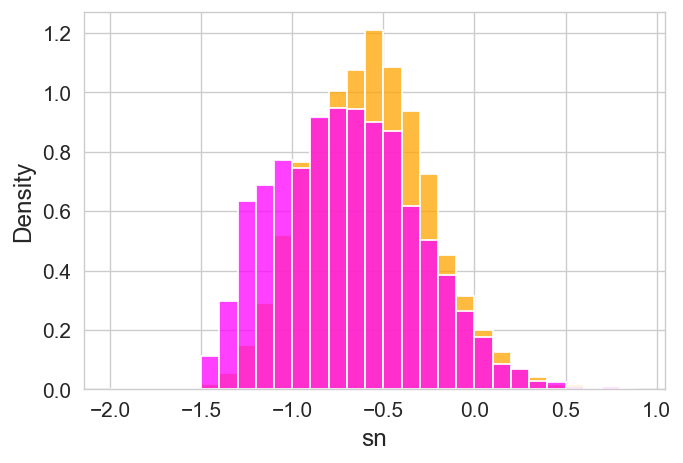

In [300]:
sns.histplot(np.log10(sn),bins = bins,color='orange',stat='density')
sns.histplot(np.log10(mmres.sn),bins=bins,color='magenta',stat='density')


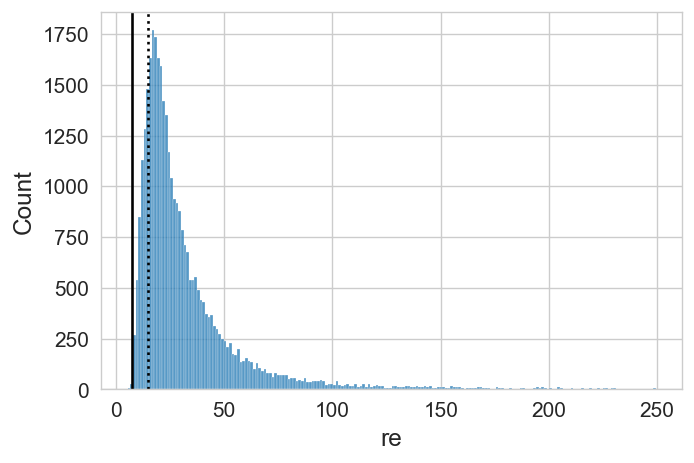

In [316]:
sns.histplot(allre.re)
plt.axvline(x=15,c='k',ls=':')
plt.axvline(x=7.5,c='k',ls='-')


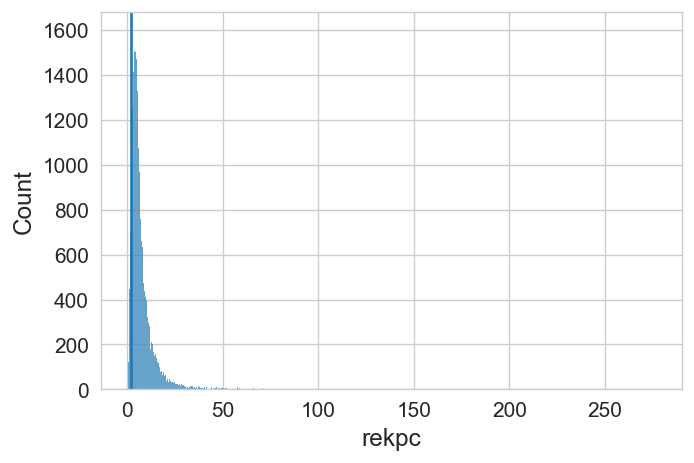

In [303]:
sns.histplot(allre.rekpc)
plt.axvline(2)